<a href="https://colab.research.google.com/github/DISHANTJOSHI1/dishant_data690/blob/main/assignement_05/part_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 05: Part 5- Intro to Pandas
- Name: Dishant Fapot
- Date: 03/05/2022

Handling Missing Data with Pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.isnull(np.nan)

True

In [3]:
pd.isnull(None)

True

In [4]:
pd.notnull(np.nan)

False

In [5]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [6]:
pd.Series([1, 2, np.nan]).sum()

3.0

In [7]:
pd.Series([1, 2, np.nan]).count()

2

Filtering missing data

In [8]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])


In [9]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [10]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [11]:
pd.notnull(s).sum()

4

In [12]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [13]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

Dropping null values on DataFrames

In [14]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})

In [15]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [19]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [21]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [22]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [23]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [26]:
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [27]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [28]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [29]:
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [30]:
missing_values = len(s.dropna()) != len(s)
missing_values

True

Finding Unique Values

In [31]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [32]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [33]:
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [34]:
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In [37]:
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10

In [39]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [40]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [43]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In [42]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [44]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [45]:
players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [46]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [47]:
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [48]:
df = df['Data'].str.split('_', expand=True)

In [49]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

In [50]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [51]:
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

In [52]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [54]:
x = np.arange(-10, 11)

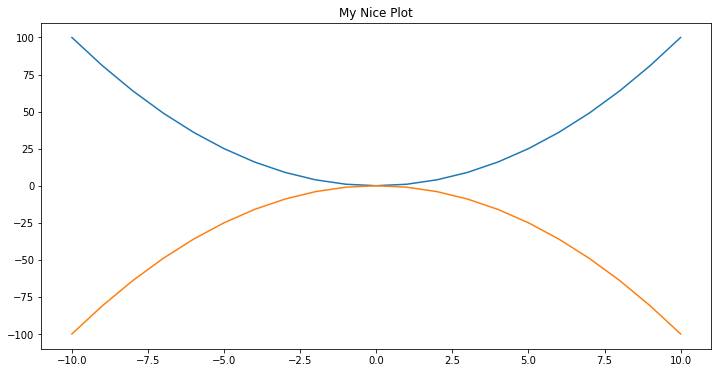

In [55]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X Squared')

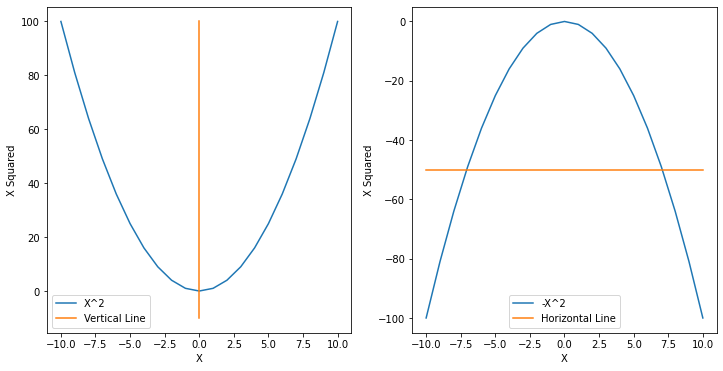

In [56]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

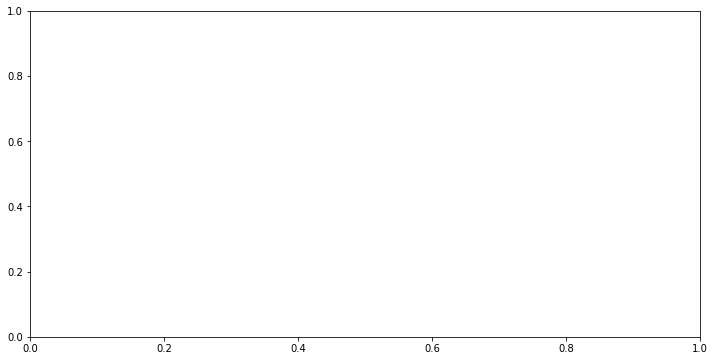

In [57]:
fig, axes = plt.subplots(figsize=(12, 6))


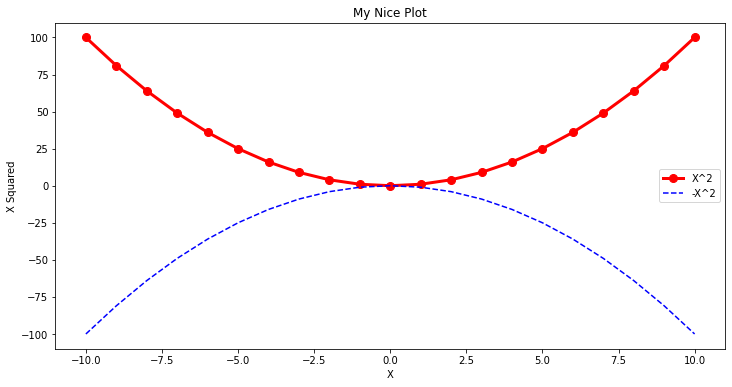

In [58]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

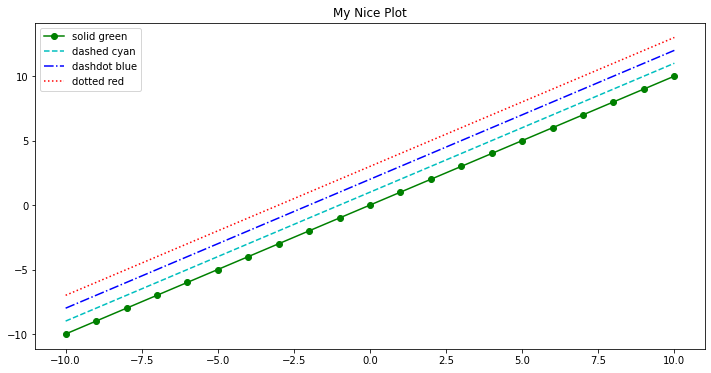

In [59]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

(<Figure size 1008x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b89cfb4d0>,
       dtype=object))

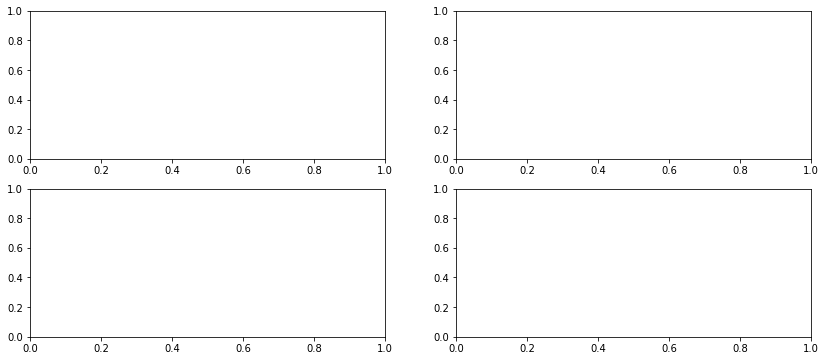

In [60]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

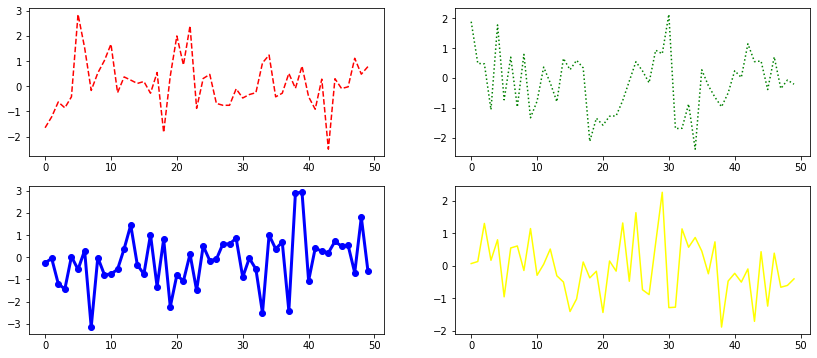

In [61]:
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)
fig

In [70]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2

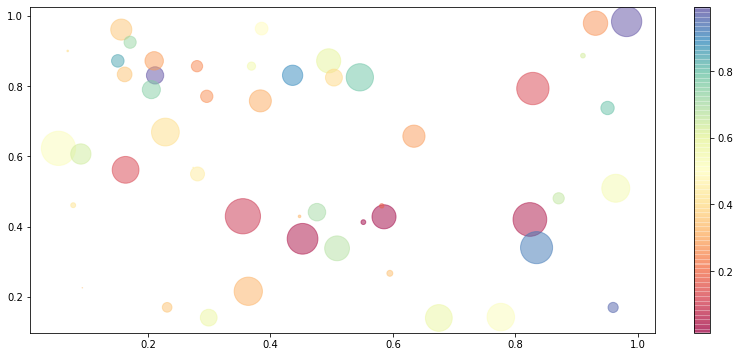

In [72]:
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

In [75]:
values = np.random.randn(1000)

In [76]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

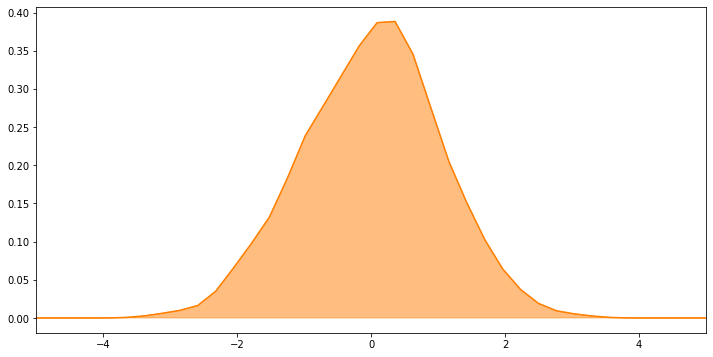

In [77]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

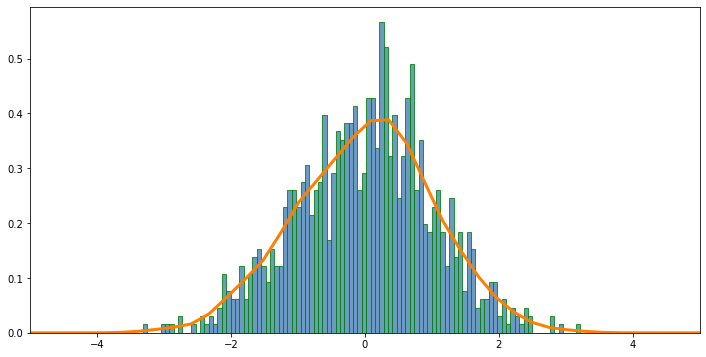

In [78]:
  plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [79]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

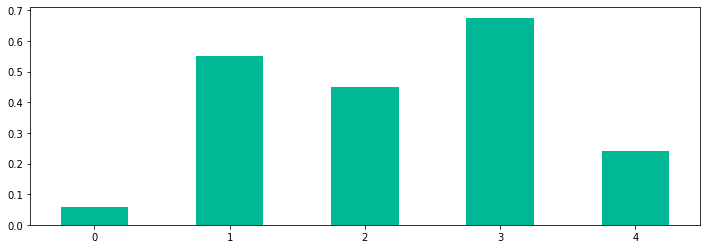

In [80]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

In [81]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])


{'boxes': [<matplotlib.lines.Line2D at 0x7f1b7965d7d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1b796617d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b795e9810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b795e92d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1b7965dd10>,
  <matplotlib.lines.Line2D at 0x7f1b79661290>]}

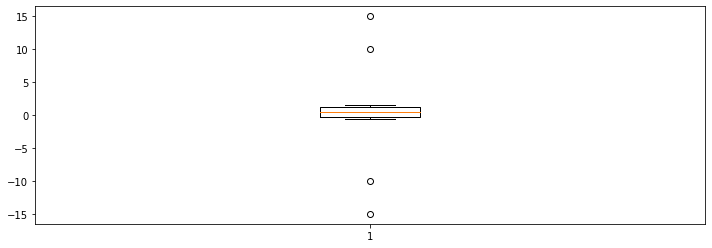

In [82]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)

Import clean data

In [83]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/ine-rmotr-curriculum/data-cleaning-rmotr-freecodecamp/master/data/btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

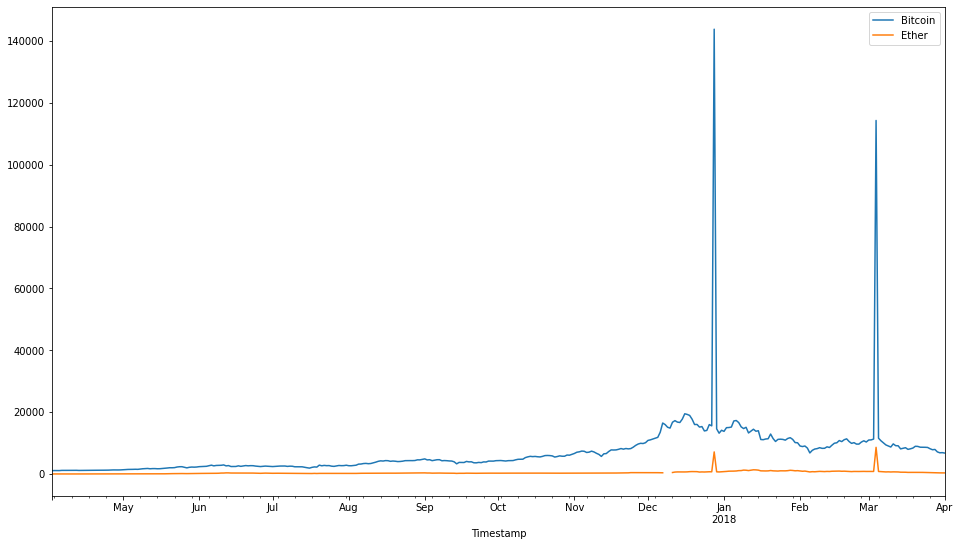

In [84]:
df.plot(figsize=(16, 9))


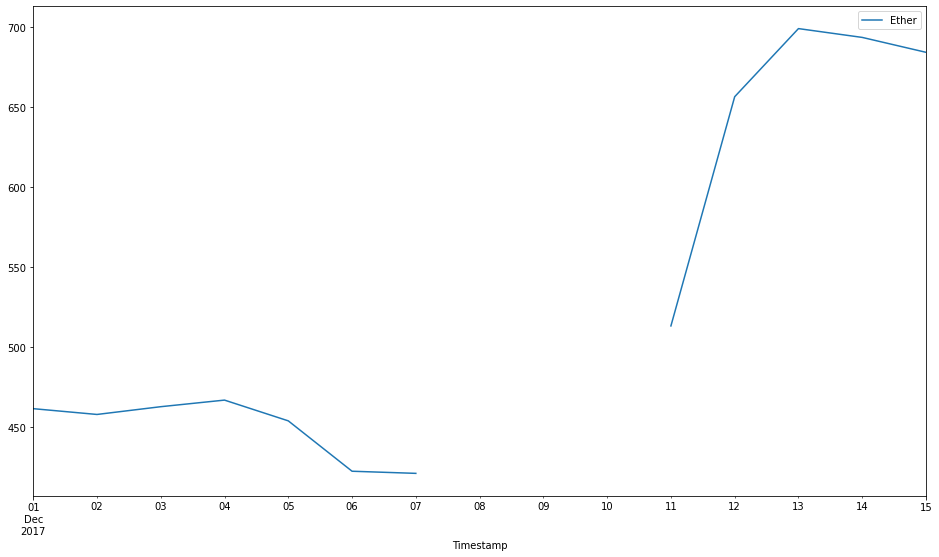

In [85]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))


In [86]:
df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')


,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [87]:
df.fillna(method='bfill', inplace=True)


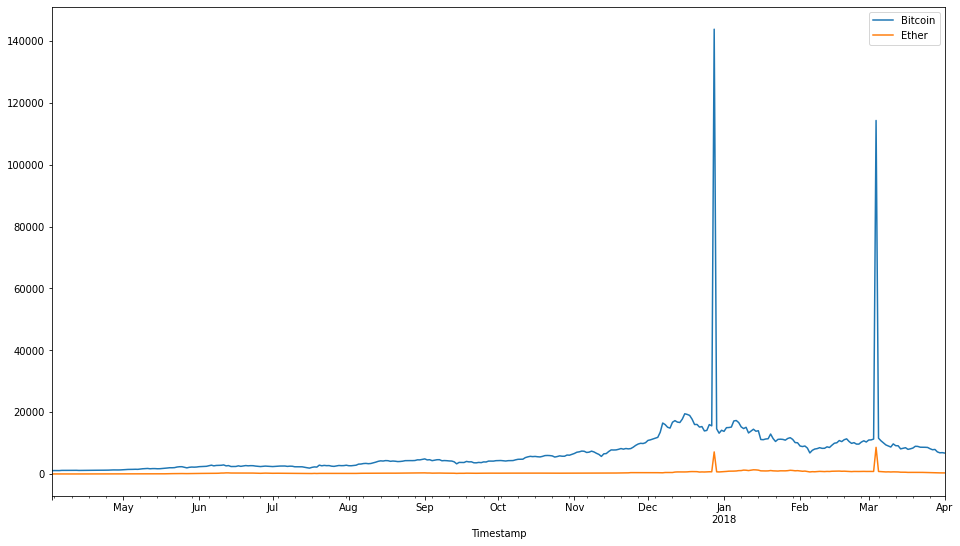

In [88]:
df.plot(figsize=(16, 9))


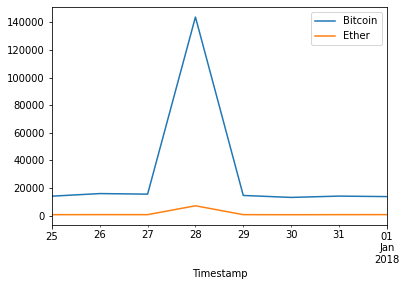

In [93]:
df['2017-12-25':'2018-01-01'].plot()

In [92]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))

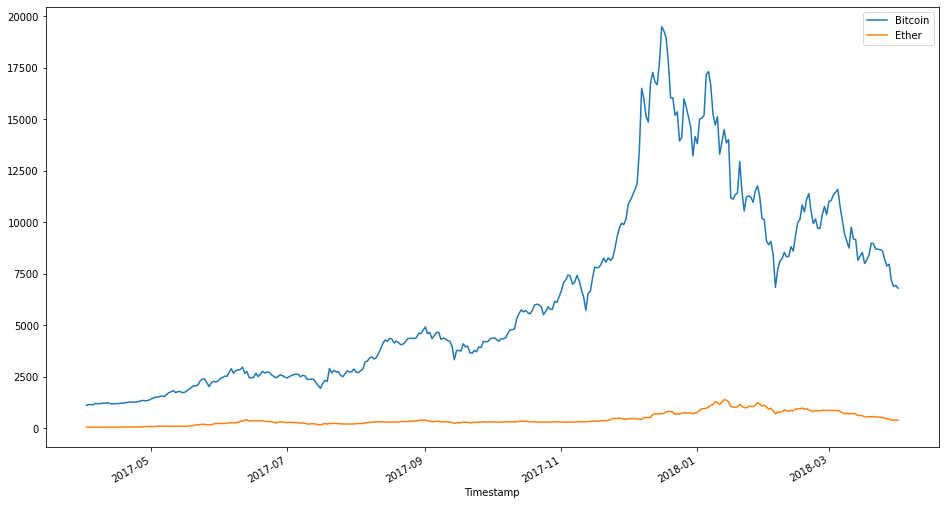

In [91]:
df_cleaned.plot(figsize=(16, 9))